In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import statsmodels.api as sm

In [4]:
df = pd.read_excel("C:/Users/Elin/Downloads/covid19 Dataset.xlsx", sheet_name="covid19 Dataset")



In [13]:
#Q1-a

df_largest =df.nlargest(5, ['TotalRecovered'])
df_largest['Country/Region'].values.tolist()




['USA', 'Brazil', 'India', 'Russia', 'South Africa']

In [14]:
#Q1-b
df.groupby("Continent")["TotalDeaths"].sum().idxmax()


'North America'

In [15]:
#Q1-c

idx = df.groupby('Continent')['TotalRecovered'].idxmax()

df.loc[idx]["Country/Region"].values.tolist()


['South Africa', 'India', 'Australia', 'Russia', 'USA', 'Brazil']

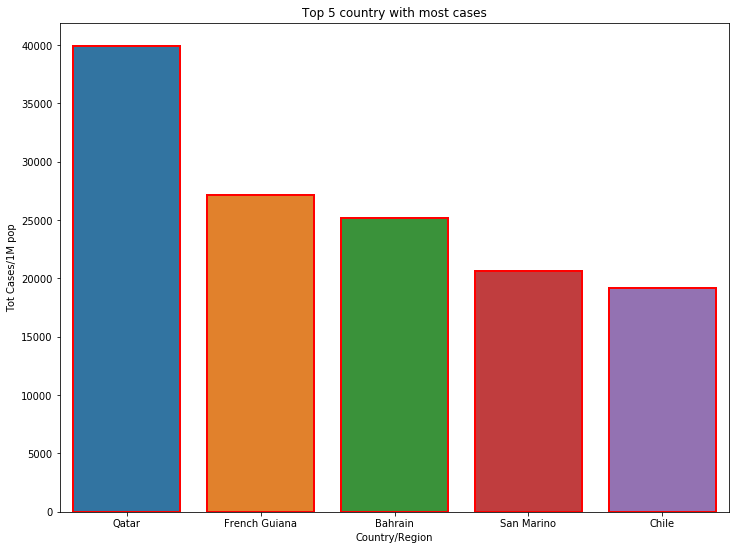

In [16]:
#Q1-d
Top_events = pd.pivot_table(df , index='Country/Region',values=["Population","Tot Cases/1M pop","Deaths/1M pop","ActiveCases"])
Top_events["Active Cases/1M pop"]=(Top_events["ActiveCases"]/Top_events["Population"]*1000000).round(0)
top_cases = Top_events.sort_values(by="Tot Cases/1M pop",ascending=False).reset_index()
fig = plt.figure(figsize = (12,9))
plt.title("Top 5 country with most cases")
ax = sns.barplot(data = top_cases.iloc[:5],y="Tot Cases/1M pop",x ="Country/Region", linewidth = 2, edgecolor = "red")


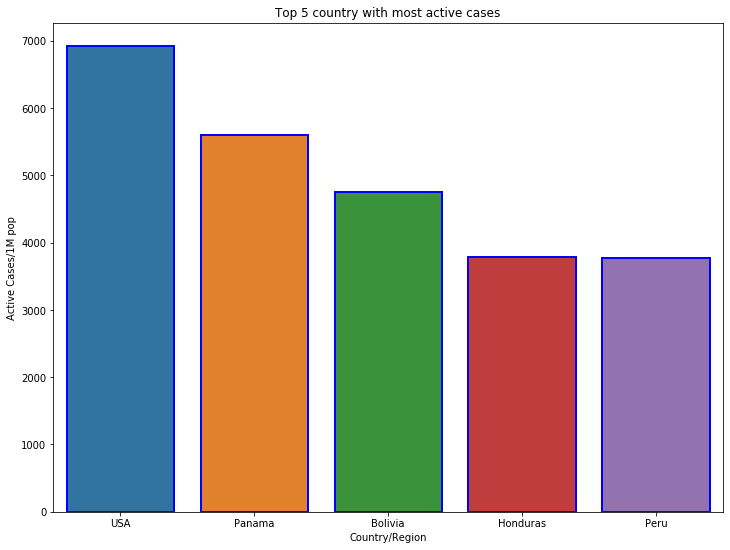

In [17]:
top_actice_cases = Top_events.sort_values(by="Active Cases/1M pop",ascending=False).reset_index()
fig = plt.figure(figsize = (12,9))
plt.title("Top 5 country with most active cases")
ay = sns.barplot(data = top_actice_cases.iloc[:5],y="Active Cases/1M pop",x ="Country/Region", linewidth = 2, edgecolor = "blue")


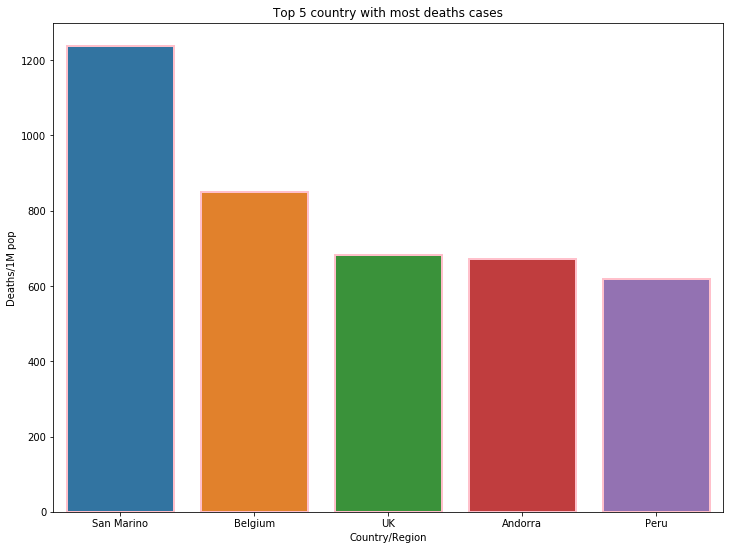

In [18]:
top_deaths_cases = Top_events.sort_values(by="Deaths/1M pop",ascending=False).reset_index()
fig = plt.figure(figsize = (12,9))
plt.title("Top 5 country with most deaths cases")
az = sns.barplot(data = top_deaths_cases.iloc[:5],y="Deaths/1M pop",x ="Country/Region", linewidth = 2, edgecolor = "pink")


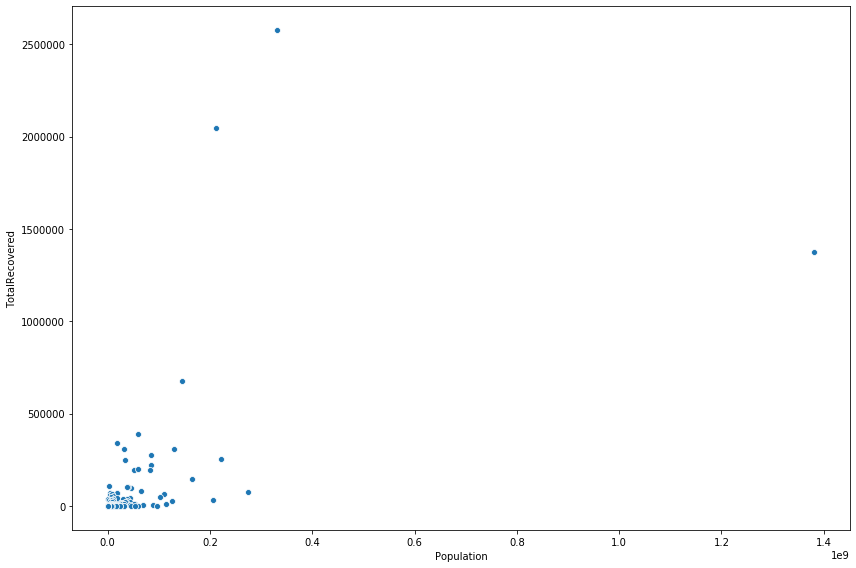

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TotalRecovered   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     108.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           1.54e-20
Time:                        12:28:47   Log-Likelihood:                -2786.7
No. Observations:                 204   AIC:                             5577.
Df Residuals:                     202   BIC:                             5584.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.562e+04   1.52e+04      1.030      0.304   -1.43e+04    4.55e+04
Population     0.0014      0.000     10.392      0.000       0.001       0.002
==============================================================================
Omnibus:                      327.321   Durbin-Watson:                   0.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45578.414
Skew:                           7.748   Prob(JB):                         0.00
Kurtosis:                      74.569   Cond. No.                     1.14e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#Q1-5
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import statsmodels.api as sm


#y_formatter = ScalarFormatter(useOffset=False)
#ax.yaxis.set_major_formatter(y_formatter)

df_pop_and_recovered = df[['TotalRecovered','Population']]
df_pop_and_recovered = df_pop_and_recovered.dropna()
y = df_pop_and_recovered['TotalRecovered'] 

x = df_pop_and_recovered['Population']
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=x, y=y)
plt.show()
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit()
lm.summary()



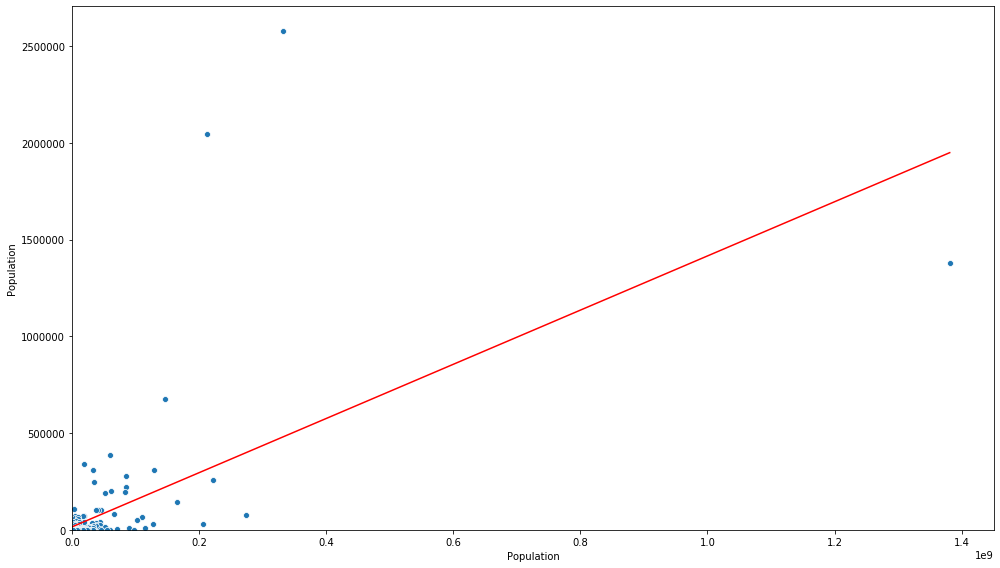

In [20]:
#ניתן לשים שהקשר הלינארי חלש r^2 = 0.348
y_pred = 0.0014*(df_pop_and_recovered['Population']) + 1.562e+04
plt.figure(figsize=(14, 8), tight_layout=True)

sns.scatterplot(x=df_pop_and_recovered['Population'], y=df_pop_and_recovered['TotalRecovered'] )

#plotting the line
sns.lineplot(x=df_pop_and_recovered['Population'],y=y_pred, color='red')

#axes
plt.xlim(0)
plt.ylim(0)
plt.savefig('linear_regression')
plt.show()


In [21]:
##בשבילי למחוק
from sklearn import datasets, linear_model
import numpy as np
regr = linear_model.LinearRegression()
xdata = df_pop_and_recovered['TotalRecovered'].to_numpy().reshape(-1,1)

ydata = df_pop_and_recovered['Population']
regr.fit(xdata, ydata)
regr.score(xdata, ydata)


0.34838220515525276

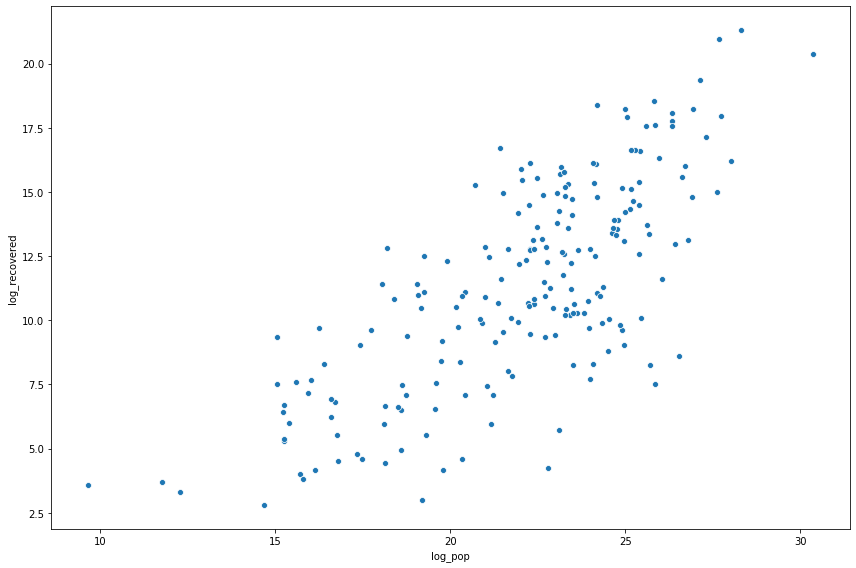

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_recovered   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     245.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           9.79e-37
Time:                        12:28:59   Log-Likelihood:                -492.55
No. Observations:                 204   AIC:                             989.1
Df Residuals:                     202   BIC:                             995.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3797      1.209     -6.103      0.000      -9.764      -4.996
log_pop        0.8494      0.054     15.667      0.000       0.743       0.956
==============================================================================
Omnibus:                        4.218   Durbin-Watson:                   1.064
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                4.269
Skew:                          -0.327   Prob(JB):                        0.118
Kurtosis:                       2.728   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#ניתן לשים לב שאחרי טרנספורמציית לוג קיים קשר לינארי חזק יותר 
#r^2 = 0.549
import numpy as np
df_pop_and_recovered = df[['TotalRecovered','Population']]
df_pop_and_recovered = df_pop_and_recovered.dropna()
df_pop_and_recovered['log_pop'] = np.log2(df_pop_and_recovered['Population'])
df_pop_and_recovered['log_recovered'] = np.log2(df_pop_and_recovered['TotalRecovered'])
xlog = df_pop_and_recovered['log_pop']
ylog = df_pop_and_recovered['log_recovered']
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=xlog, y=ylog)
plt.show()
xlog = sm.add_constant(xlog) # adding a constant
lm = sm.OLS(ylog,xlog).fit()
lm.summary()


חישוב קצת ההתפשטות - חישוב מקדם ההדבקה, חישבתי אותו על ידי חישוב מספר המאומתים החדשים בשבעה ימים האחרונים חלקי מספר המאומתים החדשים בשבעה ימים שאחריהם , וכל זה בחזקת 4/7.
הגעתי לנוסחא הזאת על פי מאמר שתיאר כיצד חושב מקדם ההדבקה במדינה.
על פי הגרף ניתן לראות כי מקדם ההדבקה עלה בצורה חדה עד מרץ לאחר מכן יש ירידה חדהת בין מרץ לאפריל יש תנודות בין עליה לירידה ולקראת אפריל קצב ההדבקה מתייצב ועומד על 1,כלומר מספר החולים מדיי שבוע נשאר קבוע, . 

In [23]:
day_wise = pd.read_excel("C:/Users/Elin/Downloads/covid19 Dataset.xlsx", sheet_name="day_wise")



In [10]:
day_wise.loc[20:40,:]

Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
20 2020-02-11      44675    1113       4417   39145       2042         100   
21 2020-02-12      46561    1118       4849   40594       1886           5   
22 2020-02-13      60206    1371       5930   52905      13645         253   
23 2020-02-14      66690    1523       7613   57554       6484         152   
24 2020-02-15      68765    1666       8902   58197       2075         143   
25 2020-02-16      70879    1770      10319   58790       2114         104   
26 2020-02-17      72815    1868      11951   58996       1936          98   
27 2020-02-18      74609    2008      13693   58908       1794         140   
28 2020-02-19      75030    2123      15394   57513        421         115   
29 2020-02-20      75577    2246      17369   55962        547         123   
30 2020-02-21      76206    2250      17966   55990        629           4   
31 2020-02-22      77967    2457      21849   53661       1761         207   
32 2020-02-23      78290    2467      22304   53519        323          10   
33 2020-02-24      78854    2627      24047   52180        564         160   
34 2020-02-25      79707    2707      26652   50348        853          80   
35 2020-02-26      80670    2767      29077   48826        963          60   
36 2020-02-27      82034    2810      31919   47305       1364          43   
37 2020-02-28      83411    2867      35306   45238       1377          57   
38 2020-02-29      85306    2936      38314   44056       1895          69   
39 2020-03-01      87690    2990      41208   43492       2384          54   
40 2020-03-02      89664    3079      44085   42500       1974          89   

    New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
20            703                2.49                   9.89   
21            432                2.40                  10.41   
22           1081                2.28                   9.85   
23           1683                2.28                  11.42   
24           1289                2.42                  12.95   
25           1417                2.50                  14.56   
26           1632                2.57                  16.41   
27           1742                2.69                  18.35   
28           1701                2.83                  20.52   
29           1975                2.97                  22.98   
30            597                2.95                  23.58   
31           3883                3.15                  28.02   
32            455                3.15                  28.49   
33           1743                3.33                  30.50   
34           2605                3.40                  33.44   
35           2425                3.43                  36.04   
36           2842                3.43                  38.91   
37           3387                3.44                  42.33   
38           3008                3.44                  44.91   
39           2894                3.41                  46.99   
40           2877                3.43                  49.17   

    Deaths / 100 Recovered  No. of countries  
20                   25.20                26  
21                   23.06                26  
22                   23.12                26  
23                   20.01                27  
24                   18.71                27  
25                   17.15                27  
26                   15.63                27  
27                   14.66                27  
28                   13.79                28  
29                   12.93                28  
30                   12.52                30  
31                   11.25                30  
32                   11.06                31  
33                   10.92                36  
34                   10.16                41  
35                    9.52                47  
36                    8.80                51  
37                    8.12           

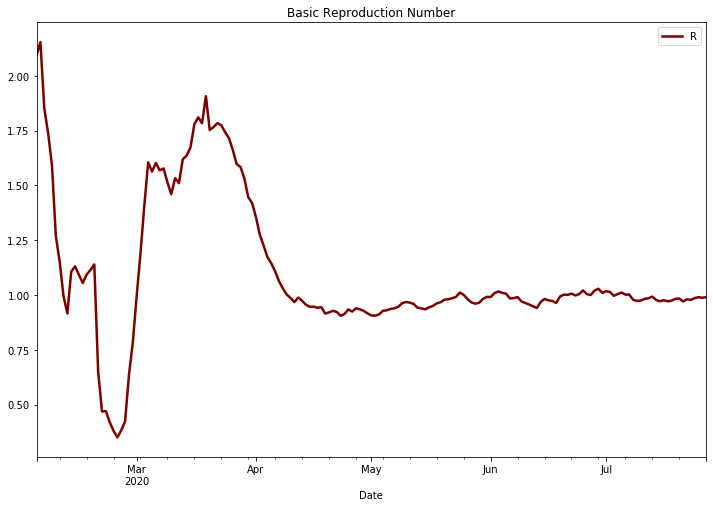

In [24]:




day_wise['last7days']=day_wise['New cases'].rolling(7).sum()

one_week_ago = day_wise.Date - pd.Timedelta("7 day")
two_week_ago = day_wise.Date - pd.Timedelta("14 days")


day_wise["Two_weeks_ago"] = [day_wise["New cases"][day_wise["Date"].between(two_week_ago, one_week_ago)].sum()
                    for two_week_ago, one_week_ago in zip(two_week_ago, one_week_ago)]


day_wise.loc[:,"R"] = (day_wise["last7days"]/day_wise["Two_weeks_ago"])**(4/7)

day_wise = day_wise.loc[13:188]

day_wise.plot(x='Date', y='R',figsize=(12, 8), linewidth=2.5, color='maroon',title = "Basic Reproduction Number")


In [25]:
covid_19_clean_complete = pd.read_excel("C:/Users/Elin/Downloads/covid19 Dataset.xlsx", sheet_name="covid_19_clean_complete")


In [26]:
#add column with Continent name
covid_19_clean_complete = covid_19_clean_complete.merge(df[["Country/Region","Continent"]], how = 'left',
                                                        on=["Country/Region"])



In [27]:
full_grouped = pd.read_excel("C:/Users/Elin/Downloads/covid19 Dataset.xlsx", sheet_name="full_grouped")




In [28]:
#difference between contries in two dataframes
set(full_grouped["Country/Region"]).symmetric_difference(covid_19_clean_complete["Country/Region"])


{'Afghanistan', 'Albania'}

In [29]:
#Fill null value in covid_19_clean_complete['Province/State']
covid_19_clean_complete['Province/State'].fillna('No Province/State',inplace=True)



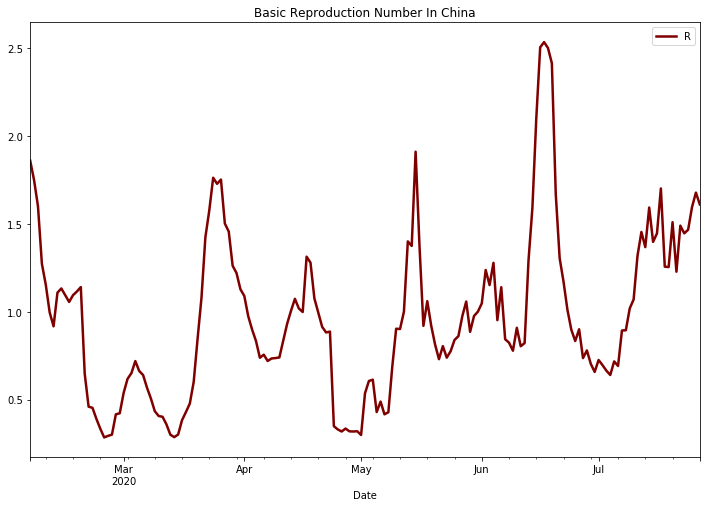

In [52]:
China_data = full_grouped.loc[full_grouped["Country/Region"]== "China"]
China_data.loc[32717:232895,:]
#קצב הדבקה בהודו
new_cases_china = pd.pivot_table(China_data,index="Date", values="New cases")
new_cases_china['week_ago']=new_cases_china['New cases'].rolling(7).sum()
new_cases_china=new_cases_china.reset_index()
one_week_ago = new_cases_china.Date - pd.Timedelta("7 day")
two_week_ago = new_cases_china.Date - pd.Timedelta("14 days")


new_cases_china["Two_weeks_ago"] = [new_cases_china["New cases"][new_cases_china["Date"].between(two_week_ago, one_week_ago)].sum()
                    for two_week_ago, one_week_ago in zip(two_week_ago, one_week_ago)]



new_cases_china.loc[:,"R"] = (new_cases_china["week_ago"]/new_cases_china["Two_weeks_ago"])**(4/7)
new_cases_china.replace([np.inf, -np.inf], np.nan, inplace=True)
new_cases_china.dropna(subset=["R"], how="all", inplace=True)

new_cases_china = new_cases_china.loc[15:]
new_cases_china.plot(x='Date', y='R',figsize=(12, 8), linewidth=2.5, color='maroon',title = "Basic Reproduction Number In China")



In [30]:
#Q2- I choose to focus on India

india_data = full_grouped.loc[full_grouped["Country/Region"]== "India"]

india_data.describe()


Confirmed        Deaths      Recovered         Active     New cases  \
count  1.880000e+02    188.000000     188.000000     188.000000    188.000000   
mean   2.174652e+05   5913.994681  126509.148936   85042.090426   7872.728723   
std    3.544779e+05   9000.138147  223808.885559  122839.589861  12016.207817   
min    0.000000e+00      0.000000       0.000000       0.000000      0.000000   
25%    4.200000e+01      0.000000       3.000000      39.000000      5.750000   
50%    2.540650e+04    802.500000    5718.500000   18885.500000   1657.000000   
75%    2.893375e+05   8201.000000  138203.250000  142205.750000  10716.250000   
max    1.480073e+06  33408.000000  951166.000000  495499.000000  49981.000000   

        New deaths  New recovered  
count   188.000000     188.000000  
mean    177.702128    5059.393617  
std     257.971388    8272.057941  
min      -1.000000       0.000000  
25%       0.000000       0.000000  
50%      54.500000     560.000000  
75%     307.250000    6975.250000  
max    2003.000000   36141.000000

            New cases
Date                 
2020-03-01          0
2020-03-02          2
2020-03-03          0
2020-03-04         23
2020-03-05          2
2020-03-06          1
2020-03-07          3
2020-03-08          5
2020-03-09          4
2020-03-10         13
2020-03-11          6
2020-03-12         11
2020-03-13          9
2020-03-14         20
2020-03-15         11
2020-03-16          6
2020-03-17         23
2020-03-18         14
2020-03-19         38
2020-03-20         50
2020-03-21         86
2020-03-22         66
2020-03-23        103
2020-03-24         37
2020-03-25        121
2020-03-26         70
2020-03-27        160
2020-03-28        100
2020-03-29         37
2020-03-30        227
2020-03-31        146
2020-04-01        601
2020-04-02        545
2020-04-03         24
2020-04-04        515
2020-04-05        506
2020-04-06       1190
2020-04-07        533
2020-04-08        605
2020-04-09        809
2020-04-10        873
2020-04-11        848
2020-04-12        759
2020-04-13

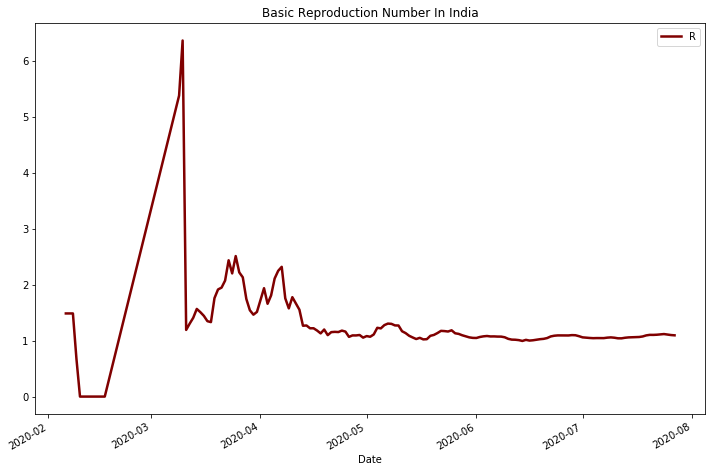

In [46]:
#קצב הדבקה בהודו
new_cases_india = pd.pivot_table(india_data,index="Date", values="New cases")
print(new_cases_india.loc[(new_cases_india.index >="2020-03-01" )&(new_cases_india.index<="2020-04-22")])
new_cases_india['week_ago']=new_cases_india['New cases'].rolling(7).sum()
new_cases_india=new_cases_india.reset_index()
one_week_ago = new_cases_india.Date - pd.Timedelta("7 day")
two_week_ago = new_cases_india.Date - pd.Timedelta("14 days")


new_cases_india["Two_weeks_ago"] = [new_cases_india["New cases"][new_cases_india["Date"].between(two_week_ago, one_week_ago)].sum()
                    for two_week_ago, one_week_ago in zip(two_week_ago, one_week_ago)]



new_cases_india.loc[:,"R"] = (new_cases_india["week_ago"]/new_cases_india["Two_weeks_ago"])**(4/7)
new_cases_india.replace([np.inf, -np.inf], np.nan, inplace=True)
new_cases_india.dropna(subset=["R"], how="all", inplace=True)

new_cases_india.plot(x='Date', y='R',figsize=(12, 8), linewidth=2.5, color='maroon',title = "Basic Reproduction Number In India")


Text(0.5, 1.0, 'New deaths In India')

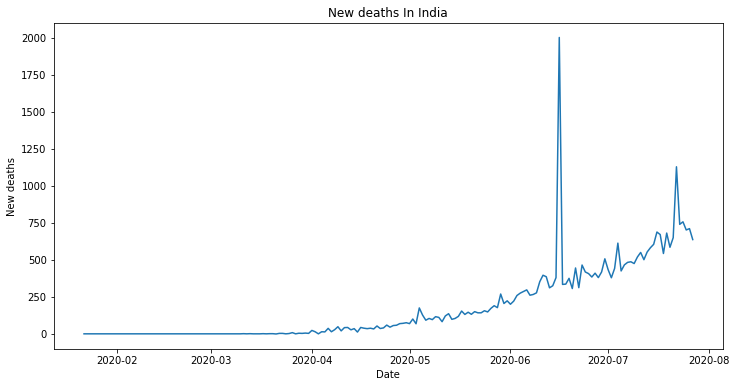

In [26]:
fig = plt.figure(figsize = (12,6))
ax = sns.lineplot(data =india_data,y='New deaths',x='Date')
ax.set_title("New deaths In India")

Text(0.5, 1.0, 'Deaths In India')

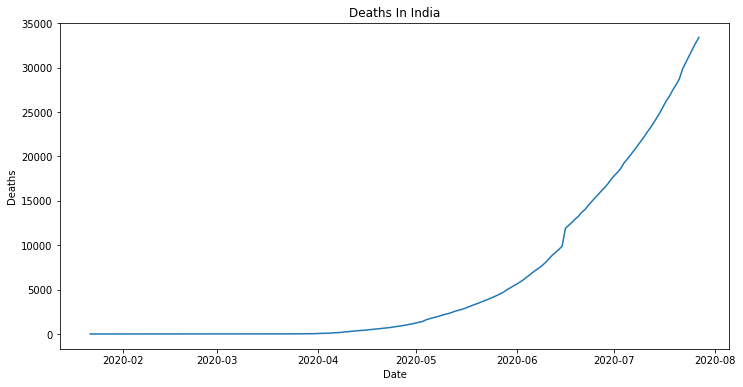

In [27]:
fig = plt.figure(figsize = (12,6))
ax = sns.lineplot(data =india_data,y='Deaths',x='Date')
ax.set_title("Deaths In India")

אפשר לראות שמשהו משמעותי קורה באמצע יוני,יש עליה משמעותית במספר המתים החדשים,הדבר הזה מוסבר על ידי גם שמחוז בהודו דיווח על מתים ב״פיגור״ ולכן ב16.06 נרשם מספר מקרי המוות הגבוהה ביותר.(ניתן לראות זאת בגרף למטה)

In [32]:
import plotly.express as px

In [33]:
fig = px.line(data_frame = india_data,
             x= "Date",
             y =['New cases','New deaths','New recovered'],
             labels={
                 'Active':"Count",
                 'New deaths':'Count',
                 'New recovered':'Count'
             },
             orientation = 'v',
             color_discrete_sequence = px.colors.qualitative.Pastel_r,
             template="plotly_dark")
fig.update_layout(width=1000,
                 height=500,
                 title="Daily New Cases,Deaths And Recovered")
fig.show()

In [34]:
date_data = pd.pivot_table(india_data,index='Date',values=["Confirmed","Deaths","Recovered"])
date_data.reset_index(inplace = True)
date_data["Recovery_rate"] = (date_data["Recovered"]/date_data["Confirmed"]*100).round(0)
date_data["Death_rate"] = (date_data["Deaths"]/date_data["Confirmed"]*100).round(0)
fig = px.line(data_frame = date_data,
             x= "Date",
             y =['Recovery_rate','Death_rate'],
             labels={
                 "value":'Percentage Rate'
                 
                 
             },
             orientation = 'v',
             color_discrete_sequence = px.colors.qualitative.Pastel_r,
             template="plotly_dark")
fig.update_layout(width=1000,
                 height=500,
                 title="Recovery Rate Vs Death Rate Over Time")
fig.show()



12/03- 
הודו מדווחת על האדם הראשון שנפטר מקורונה


In [35]:
#בדקתי מה קורה בין פברואר למרץ , מאחר ויש בתקופה זו מעט חולים לכן רובם גם מחלימים ולכן שיעור החלמה מזנק שם
mask = (date_data['Date'] > "2020-02-22") & (date_data['Date'] <= "2020-03-06" )
date_data.loc[mask]


Date  Confirmed  Deaths  Recovered  Recovery_rate  Death_rate
32 2020-02-23          3       0          3          100.0         0.0
33 2020-02-24          3       0          3          100.0         0.0
34 2020-02-25          3       0          3          100.0         0.0
35 2020-02-26          3       0          3          100.0         0.0
36 2020-02-27          3       0          3          100.0         0.0
37 2020-02-28          3       0          3          100.0         0.0
38 2020-02-29          3       0          3          100.0         0.0
39 2020-03-01          3       0          3          100.0         0.0
40 2020-03-02          5       0          3           60.0         0.0
41 2020-03-03          5       0          3           60.0         0.0
42 2020-03-04         28       0          3           11.0         0.0
43 2020-03-05         30       0          3           10.0         0.0
44 2020-03-06         31       0          3           10.0         0.0

Text(0.5, 1.0, 'New cases In South-East Asian Region')

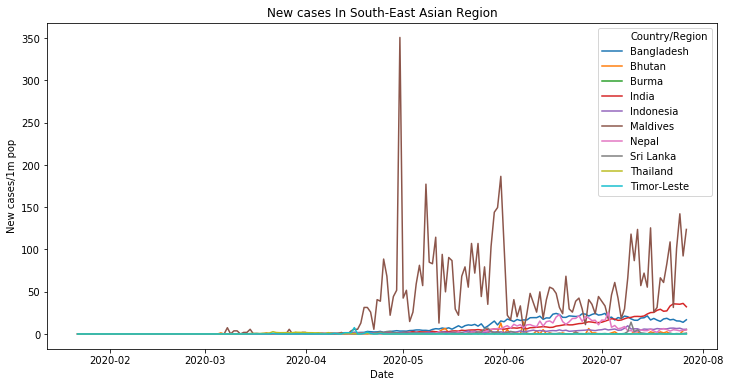

In [36]:
#נסתכל על המקרים החדשים בקרב כל המדינות שנמצאות בארגון הבריאות של הודו
WHO_data = full_grouped.loc[full_grouped["WHO Region"]== "South-East Asia"]
WHO_data_with_pop = WHO_data.merge(df[["Country/Region","Population"]], how = 'left',
                                                        on=["Country/Region"])
WHO_data_with_pop["New cases/1m pop"]=WHO_data_with_pop['New cases']/WHO_data_with_pop["Population"]*1000000

fig = plt.figure(figsize = (12,6))
ax = sns.lineplot(data =WHO_data_with_pop,y='New cases/1m pop',x='Date',hue="Country/Region")
ax.set_title("New cases In South-East Asian Region")


Text(0.5, 1.0, 'Active Cases In South-East Asian Region')

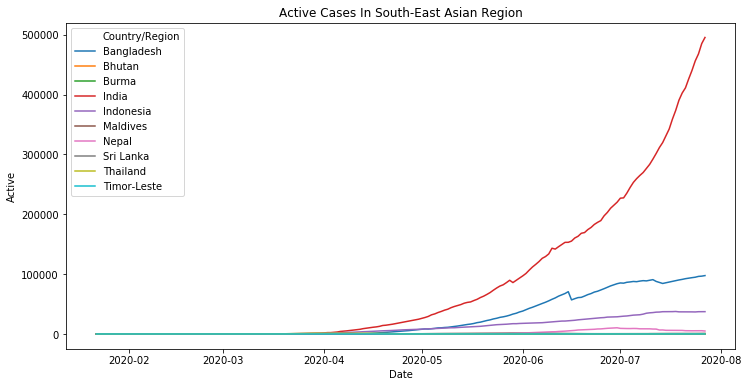

In [37]:
#לא התייחסתי לזה מכיוון שזה מראה מקרים פעילים בכל מדינה, ובהודו האוכלוסייה גדולה יותר ולכן כמות המקרים הפעילים גדולה יותר
fig = plt.figure(figsize = (12,6))
ax = sns.lineplot(data =WHO_data,y='Active',x='Date',hue="Country/Region")
ax.set_title("Active Cases In South-East Asian Region")


Text(0.5, 1.0, 'India vs 5 country with highest active cases')

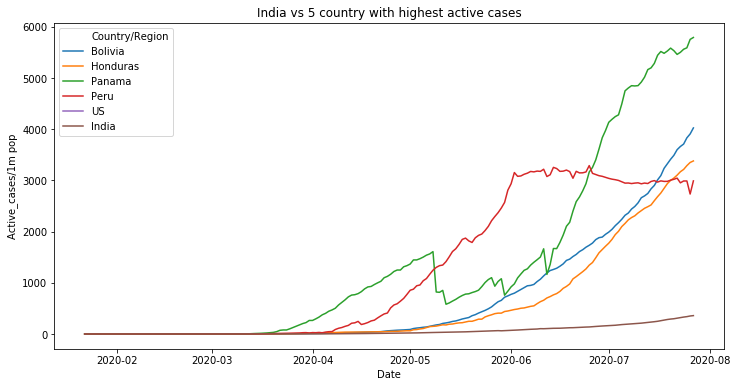

In [38]:
#מספר החולים הפעילים בהודו בהשוואה למדינות בעלות מספר החולים הפעילים הגבוה ביותר
country_data = full_grouped.loc[full_grouped["Country/Region"].isin(['India','US','Panama','Bolivia','Honduras','Peru'])]
Country_data_with_pop = country_data.merge(df[["Country/Region","Population"]], how = 'left',
                                                        on=["Country/Region"])

Country_data_with_pop["Active_cases/1m pop"]=Country_data_with_pop['Active']/Country_data_with_pop["Population"]*1000000
fig = plt.figure(figsize = (12,6))
ax = sns.lineplot(data =Country_data_with_pop,y='Active_cases/1m pop',x='Date',hue="Country/Region")
ax.set_title("India vs 5 country with highest active cases")



אני בחרתי בהודו מכיווו ששיערתי בהתחלה שמספר החולים בהודו יהיה גבוה מאחר והודו הייתה מוקד הדבקה גדול מאוד ובעלת תמותה גבוהה .
אני משערת שבתקופה זו המספרים יחסית נמוכים מאחר והודו היא מדינת עולם שלישית, ייתכן שכמות הבדיקות שהמדינה ביצעה לא הייתה מספיק גדולה, ואכן ממקורות מידע  הודו מגבילה את כמות הבדיקות עבור אנשים שחזרו מחו״ל או נפגשו עם אנשים בעלי סימפטומים.


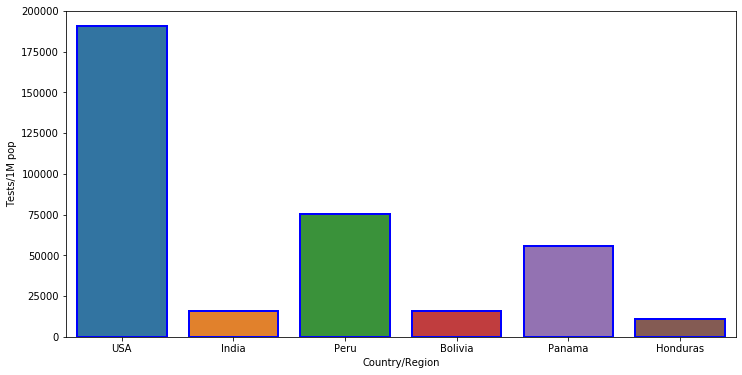

In [39]:
#שיעור הבדיקות באוכלוסיה בהודו ובחמשת המדינות בעלות מספר החולים הפעילים הגבוה ביותר
fig = plt.figure(figsize = (12,6))
ax = sns.barplot(data = df.loc[df["Country/Region"].isin(['India','USA','Panama','Bolivia','Honduras','Peru'])]
,y="Tests/1M pop",x ="Country/Region", linewidth = 2, edgecolor = "blue")


In [40]:
Confirme_cases = india_data.loc[india_data["Date"] =="2020-07-27" ,"Confirmed"].values[0]

Active_cases = india_data.loc[india_data["Date"] == "2020-07-27" ,"Active"].values[0]

Recovered_cases = india_data.loc[india_data["Date"] == "2020-07-27" ,"Recovered"].values[0]

Deaths_cases = india_data.loc[india_data["Date"] == "2020-07-27" ,"Deaths"].values[0]
px.pie(names=["Confirmed","Active","Recovered","Deaths"],values=[Confirme_cases,Active_cases,Recovered_cases,Deaths_cases],title="Covid-19 In India In 27/7/2020")
